# Optimisation for Machine Learning

October 04, 2023

### Logistic
Contact: [Clement Royer](mailto:clement.royer@lamsade.dauphine.fr)
Lecture's web: [URL](https://www.lamsade.dauphine.fr/%7Ecroyer/teachOAA.html)
Examen: 60% (2h), dated December 13, 2023 10:00 AM - 12:00 PM
Project: 40%, during from October 6, 2023 to December 23, 2023

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

**Today**: More on Gradient Descent and Non-Convexity
**Tomorrow**: Regularization and Proximal Gradient

**Problem**: $\min_{w \in \mathbb{R}^d} f(w)$ where $f: \mathbb{R}^d \rightarrow \mathbb{R}$ is convex and differentiable.

Gradient descent iteration: $\forall k \geq 0, w^{k+1} = w^k - \alpha_k \nabla f(w^k)$ where $\alpha_k > 0$ is the step size.

#### Choosing the step size $\alpha_k$ (a.k.a learning rate in ML): 

**Recall**: When $f \in \mathcal{C}^{1, 1}_L$ (i.e. $\mathcal{C}^{1} + \nabla f$ is $L$-Lipschitz continuous), $\alpha_k = \frac{1}{L}$ is the good step size choice because it guarantees that $f(w^{k+1}) \leq f(w^k) - \frac{1}{2L} \|\nabla f(w^k)\|^2$. (Any $\alpha_k \in (0, \frac{2}{L})$ is also good.)

In practice, the value of $L$ could be too expensive to compute/unknown/not exist.

In this case, there are 3 main strategies to choose $\alpha_k$:
- **Constant step size**: $\alpha_k = \alpha$ for all $k \geq 0$ (e.g. $\alpha = 0.1, 0.01, 0.001$). For a sufficiently small this choice leads to convergence. For $\mathcal{C}^{1, 1}_L$ functions, $\alpha \leq \frac{2}{L}$ works. This is very popular in practice but difficult to calibrate in advance.
- **Diminishing step size**: $\alpha_k \rightarrow 0$ as $k \rightarrow \infty$. For example, $\alpha_k = \frac{\alpha}{k+1}$ or $\alpha_k = \frac{\alpha}{\sqrt{k+1}}$. For $k$ large enough, $\alpha_k \leq \frac{2}{L}$ and convergence is guaranteed for $\mathcal{C}^{1, 1}_L$ functions. Less popular than constant step size yet but useful in stochastic settings.
- **Adaptive step size**: (Learning rate scheduling) Idea is that $\alpha_k$ is chosen according to $f$ and $w^k$, $\nabla f(w^k)$, $\nabla f(w^{k-1})$, ... (e.g. $\alpha_k = \frac{\alpha}{\|\nabla f(w^k)\|}$). typically done via a line search. The GD step has the form $\underbrace{w^k - \alpha \nabla f(w^k)}_{\text{function of } \alpha}$
. We would like the best possible value of $\alpha$ in term of function value $f(w_k - \alpha \nabla f(w^k))$ as small as possible.

Exact line search: $\alpha_k = \arg\min_{\alpha \geq 0} f(w^k - \alpha \nabla f(w^k))$. This is expensive to compute. In practice, we replace by an approximate line search.

**Anmijo backtracking line search**
Start with $\alpha_k = \overline{\alpha}$ (e.g. $\overline{\alpha} = 1$). While $f(w^k - \alpha_k \nabla f(w^k)) > f(w^k) - C \alpha_k \|\nabla f(w^k)\|^2$ (e.g. $C = 10^{-4}$), update $\alpha_k = \beta \alpha_k$ (e.g. $\beta = 0.5$). Stop when $f(w^k - \alpha_k \nabla f(w^k)) \leq f(w^k) - C \alpha_k \|\nabla f(w^k)\|^2$.
Process based on a sufficient decrease condition. (See [Nocedal and Wright, Numerical Optimization, 2nd edition, 2006, p. 37](https://link.springer.com/book/10.1007/978-0-387-40065-5)). The condition will be violated $(f(w^k - \alpha_k \nabla f(w^k)) \leq f(w^k) - C \alpha_k \|\nabla f(w^k)\|^2)$ when $\alpha_k$ is small enough. The condition is satisfied when $\alpha_k$ is large enough.

If $f \in \mathcal{C}^{1, 1}_L$ and $C = \frac{1}{2}$, then $\alpha_k \leq \frac{2}{L}$ and convergence is guaranteed.
$\Longrightarrow$ for $\alpha_k = \frac{1}{L}$, we recover the guarantee of the constant step size $f(w_k - \alpha_k \nabla f(w_k)) \leq f(w_k) - \frac{1}{2L} \|\nabla f(w_k)\|^2$.

This strategy is more expensive than using constant step size or decreasing step size because it requires function evaluations $f(w^k) + f(w^k - \alpha_k \nabla f(w^k))$ for every $\alpha_k$ used in the backtracking line search. In ML (mostly in deep learning) this is often considered as prohibitive.

### Gradient Descent for Non-Convex Functions

When the objective function is convex, GD converges to the minimum value and we can derive convergence rates of the form:
$$
f(w^k) - \min_{w \in \mathbb{R}^d} f(w) \leq \mathcal{O}(\frac{1}{k}) \quad \text{for} \quad k \geq 1
$$
This guarantees obtaining thank to convexity of $f$ a value of $f$ and in particular $\forall w \in \mathbb{R}^d, \|\nabla f(w) = 0\| \leftrightarrow w$ is a global minimum of $f$.
Any local minimum of convex function is considered as global minimum

These properties no longer hold for general in non-convex functions. In particular, there are many local minima that are not global minima. 

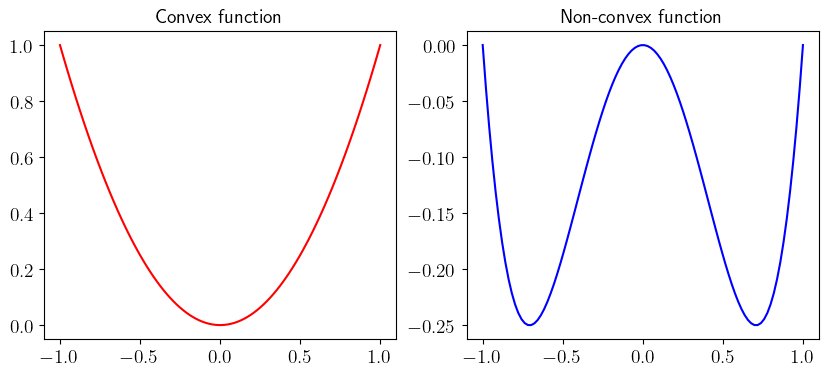

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
x = np.linspace(-1, 1, 100)
ax[0].plot(x, x**2, color='red')
ax[0].set_title('Convex function')
ax[1].plot(x, x**4 - x**2, color='blue')
ax[1].set_title('Non-convex function')
plt.show()

For non-convex functions, there may exist local minima that are not global minimas (spurious local minima).
For non-convex functions, there exist first order stationary points (i.e $w \in \mathbb{R}^d$ such that $\nabla f(w) = 0$) that are not global minimas. Saddles points (maxima in some directions and minima in other directions) are first order stationary points that are not global minimas.

For these reasons, when applying GD to a non-convex function, the goal is convergence to a first order stationary point. $rightarrow$ Consistent with the GD iteration $w^{k+1} = w^k - \alpha_k \nabla f(w^k)$ if $\nabla f(w^k) = 0$ then $w^{k+1} = w^k$.

**Theorem**: Suppose that $f$ is $\mathcal{C}^{1, 1}_L$ and GD with $\alpha_k = \frac{1}{L} \forall k \geq 0$ for $k \geq 1$ iterations. If $f$ is bounded below $(\exists \overline{f} \in \mathbb{R}, \forall w \in \mathbb{R}^d, f(w) \geq \overline{f})$, then $\lim_{k \rightarrow \infty} \|\nabla f(w^k)\| = 0$.
$$
\min_{0 \leq k \leq k-1} \|\nabla f(w^k)\| \leq \underbrace{\mathcal{O}(\frac{1}{\sqrt{k}})}_{[2L(f(w^0) - \overline{f}]^\frac{1}{2} \times \frac{1}{\sqrt{k}}}
$$

As $k \rightarrow \infty$, $\|\nabla f(w^k)\| \rightarrow 0$ and $w^k$ converges to a first order stationary point. (i.e. $\nabla f(w^k) = 0$)
Proof uses simply the fact that $f(w^{k+1}) \leq f(w^k) - \frac{1}{2L} \|\nabla f(w^k)\|^2$ and $f(w^k) \geq \overline{f}$.
Weaker than the convergence rate for convex functions
- Applied to $\|\nabla f(w^k)\|$ instead of $f(w^k) - \min_{w \in \mathbb{R}^d} f(w)$
- Rate is worse $\frac{1}{\sqrt{k}}$ vs $\frac{1}{k}$

### Benign non-convexity

Easy to construct examples of nonconvex functions for which GD fails to converge to a minimum.
But in practice that, GD usually converge to a minimum. (i.e. first order stationary point)

For specific ML problems, GD converges to a minimum (generally local but often global) and this can be explained by looking at landscape of the objective function. Set of all points with zero gradient (1st order stationary points) is called the **critical set**.

**Definition**: (Informally) An function has "benign landscape" or "benign non-convexity" if:
- $f$ has no spurious local minima (might imply that all local minima are global minima)
AND/OR
- First oder points are either local minima or strict saddle points (i.e. $f$ is strictly convex in some directions and strictly concave in other directions)
AND/OR
- GD converge to local minima on the problem

**Example**: Benign non-convexity problem: Low rank matrix approximation
Equation 1:
$$
\min_{w \in \mathbb{R}^{d \times d}} \frac{1}{2} \sum_{i, j \in \mathcal{S}} (w_{ij} - M_{ij})^2
$$
where $\mathcal{S} \subset \{1, \dots, d\} \times \{1, \dots, d\}$ is a subset of indices and $M \in \mathbb{R}^{d \times d}$ is a matrix of observations. (e.g. $M$ is a matrix of ratings of movies by users and $\mathcal{S}$ is the set of indices of observed ratings)

(1) does not provide any way to approximate the missing entries of $M$.
But in data analysis, we hypothesize that $M$ can be approximated from a subset of its coefficients.
Typically, $d \gg 1$ and $M$ is assumed to be of rank $r \ll d$ $\Rightarrow$ low rank matrix 

$M$ is rank $r$ if $\exists U \in \mathbb{R}^{d \times r}$ and $V \in \mathbb{R}^{d \times r}$ such that $M = U V^T$. Can encode all the information of $M$ using $2dr$ coefficients instead of $d^2 \gg 2dr$ coefficients.


Assuming that $M$ is of rank $r$, try to build a rank $r$ approximation of a matrix using $2dr$ coefficients $\ll d^2$ coefficients.
$$
\min_{U \in \mathbb{R}^{d \times r}, V \in \mathbb{R}^{d \times r}} \frac{1}{2} \sum_{i, j \in \mathcal{S}} (\underbrace{U_i^T V_j}_{\text{rank } r \text{ approximation of } M_{ij}} - M_{ij})^2
$$
$\Rightarrow$ Non-convex problem because of the product $U_i^T V_j$.
$\Rightarrow$ For this particular problem, $f$ has only global minima or strict saddle points.
If $|\mathcal{S}|$ is large enough $\mathcal{O}(log(d))$ can guarantee that GD will converge to a global minimum.

Other examples of benign non-convexity problems:

- Tensor factorization/completion: $\min_{u \in \mathbb{R}^d, \|u\| = 1} \frac{1}{2} \sum_{i, j, k, l \in \mathcal{S}} (\underbrace{u_i u_j u_k u_l}_{\text{Tensor approximation of } T_{ijkl}} - T_{ijkl})^2$ where $T \in \mathbb{R}^{d \times d \times d \times d}$ is a tensor of observations and $\mathcal{S} \subset \{1, \dots, d\}^4$ is a subset of indices. $[u_i u_j u_k u_l]_{ijkl} \in \{1, \dots, d\}^4 \in \mathbb{R}^{d^4}$ is a vectorization of a 4th order tensor of size $d \times d \times d \times d$.
- Phrase retrieval
- Eigenvalue calculation: $\min_{u \in \mathbb{R}^d, \|u\| = 1} u^T A u$ where $A \in \mathbb{R}^{d \times d}$ is a symmetric matrix.

**Theorem** (2016-2019): 
Let $f$ be benign non-convex. Suppose that we run GD from random initial point $w_0 \in \mathbb{R}^{d}$ then will probability 1 (almost surely) $f(w_k) \rightarrow \min_{w \in \mathbb{R}^d} f(w)$ as $k \rightarrow \infty$ (converge to a minimum).

In [36]:
h = 0.5
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)

X, Y = np.meshgrid(x, y)
F0 = 1.5 - 1.0 * np.exp(-0.03 * (3 * np.power(X, 2) + np.power(Y, 2)))
F = 1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X, 2) + np.power(Y + 3, 2)))
F2 = F + (0.5 - 1.0 * np.exp(-0.1 * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2))))
dF0y, dF0x = np.gradient(F0, h, h)
dF2y, dF2x = np.gradient(F2, h, h)

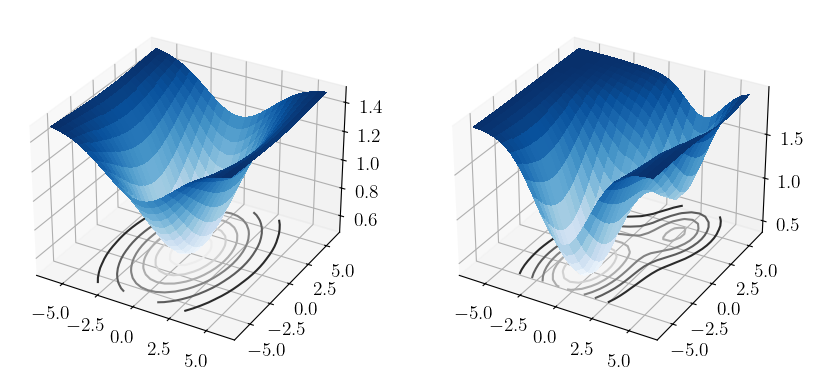

In [37]:
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 6))
axs[0].plot_surface(X, Y, F0, cmap='Blues', linewidth=0, antialiased=False)
axs[0].contour(X, Y, F0, zdir='z', offset=axs[0].get_zlim()[0], cmap='Greys')
axs[1].plot_surface(X, Y, F2, cmap='Blues', linewidth=0, antialiased=False)
axs[1].contour(X, Y, F2, zdir='z', offset=axs[0].get_zlim()[0], cmap='Greys')
plt.show()

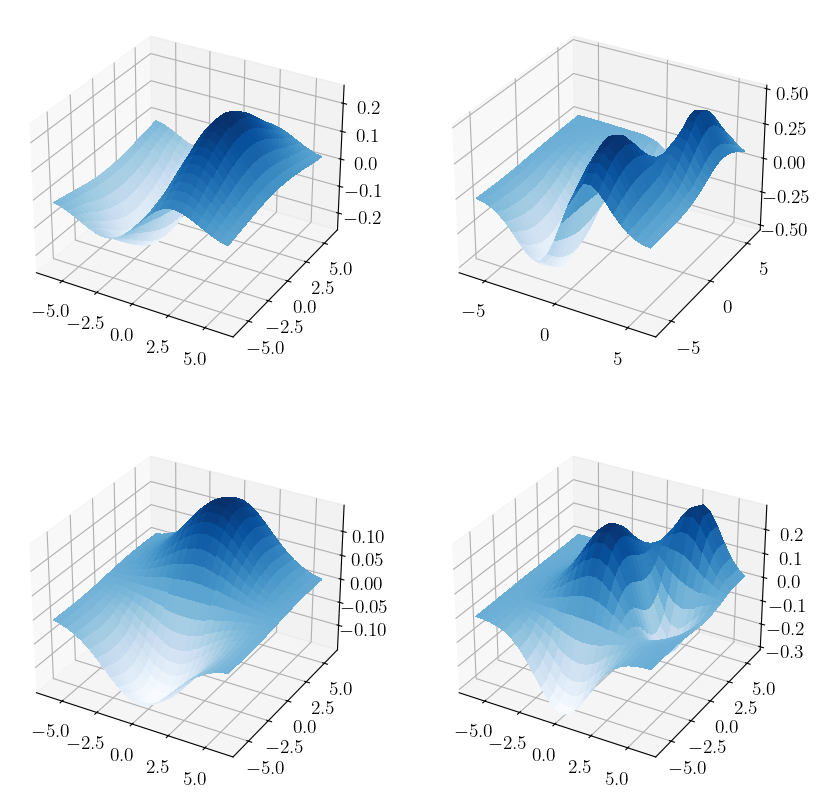

In [41]:
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(10, 10))
axs = axs.reshape(-1)
axs[0].plot_surface(X, Y, dF0x, cmap='Blues', linewidth=0, antialiased=False)
axs[2].plot_surface(X, Y, dF0y, cmap='Blues', linewidth=0, antialiased=False)
axs[1].plot_surface(X, Y, dF2x, cmap='Blues', linewidth=0, antialiased=False)
axs[3].plot_surface(X, Y, dF2y, cmap='Blues', linewidth=0, antialiased=False)
plt.show()